# Exercicio - Stiff Equations
> Gil Miranda<br>
> Repo: https://github.com/mirandagil/university-courses/tree/master/comp-cientifica-II-2019-2<br>
> GitHub: @mirandagil
   
`last update: 29/08/2019`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import time

In [2]:
start = time.time()

In [3]:
##### Vectorized forward euler
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points on time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 29/08/2019
def f_euler(F, y0, ts, p = 0):
    ys = np.array([y0])  
    h = ts[1]-ts[0]
    for tnext in ts[1:]:
        ynext = ys[-1] + F(ys[-1], ts, p)*h
        ys = np.vstack((ys, ynext))
        t = tnext
    return np.array(ys).T

In [4]:
def stiff(u, t, k):
    u_1 = -k[0]*u[0]+ k[1]*u[1]*u[2]
    u_2 = k[0]*u[0] - k[1]*u[1]*u[2] - k[2]*u[1]**2
    u_3 = k[2]*u[1]**2
    return np.array([u_1, u_2, u_3])

In [5]:
u = [1,0,0]
k = [0.04, 1e4, 3e7]

In [6]:
ts = np.arange(0,30,0.0001)

In [7]:
sol = f_euler(stiff, u, ts, k)

In [8]:
end = time.time()
print(end-start)

1078.178358078003


/usr/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


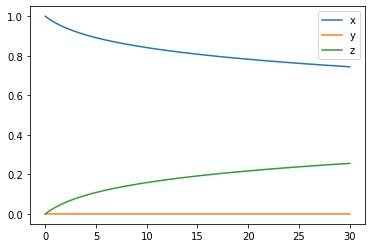

In [9]:
x = sol[0]
y = sol[1]
z = sol[2]
plt.plot(ts, x, label='x')
plt.plot(ts, y, label='y')
plt.plot(ts, z, label='z')
plt.legend()
plt.show()